In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path="/content/drive/MyDrive/Datathon 2025"

In [4]:
df_clien = pd.read_csv(os.path.join(folder_path, 'base_clientes_final(in).csv'))
df_trans = pd.read_csv(os.path.join(folder_path, 'base_transacciones_final(in).csv'))

Este dataset es el resultado de unir la base de clientes que es la información demográfica,tipo de persona, actividad empresarial. El otro dataset es de transacciones que son registros detallados de compras por clientes, su respectiva fecha , comercio, giro y tipo de venta.

In [5]:
df_clien.head()


,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial
0,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS
1,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA
2,acb2fee5aea2d73a88359d438aaedeea731554f8,2/1/1991,5/12/2019,6115121,61,Persona Fisica Con Actividad Empresarial,M,AGENCIA DE PUBLICIDAD
3,b627227d2f20116510bcb12de34e6a188cf8d054,5/23/1994,7/19/2017,6923005,69,Persona Fisica Sin Actividad Empresarial,F,COMPRA VENTA DE ARTICULOS NO CLASIFICADOS EN O...
4,054be5f40d50b28d2b82af57159343989dd28012,10/3/1990,5/21/2017,6014120,60,Persona Fisica Sin Actividad Empresarial,M,EMPLEADO DEL SECTOR SERVICIOS


In [6]:
df_trans.head()

,id,fecha,comercio,giro_comercio,tipo_venta,monto
0,91477f382c3cf63ab5cd9263b502109243741158,1/2/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,5.99
1,91477f382c3cf63ab5cd9263b502109243741158,1/5/2022,RAPPI,SERVICIOS EMPRESARIALES - NO CLASIFICADOS,digital,13.01
2,91477f382c3cf63ab5cd9263b502109243741158,1/5/2022,RAPPI,SERVICIOS EMPRESARIALES - NO CLASIFICADOS,digital,15.84
3,91477f382c3cf63ab5cd9263b502109243741158,1/5/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,8.17
4,91477f382c3cf63ab5cd9263b502109243741158,1/5/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,2.54


Se realiza una union interna usado columna id como clave común

In [7]:
df_merged = pd.merge(df_clien, df_trans, on='id', how='inner')
df_merged.head()

,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,monto
0,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,COPPEL,TIENDA DEPARTAMENTAL,digital,131.90
1,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,2.54
2,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,47.80
3,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",fisica,17.01
4,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/4/2022,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",fisica,6.44


In [8]:
df_merged.describe()

,id_municipio,id_estado,monto
count,3.460110e+05,346011.00000,346011.000000
mean,6.218603e+06,62.02541,42.290700
std,6.925190e+05,6.85655,94.554414
min,4.701001e+06,47.00000,1.390000
25%,5.509016e+06,55.00000,9.320000
50%,6.519006e+06,65.00000,17.930000
75%,6.519046e+06,65.00000,39.430000
max,7.832056e+06,78.00000,2297.880000


Se imprimen filas  y columnas.

In [9]:
print(df_merged.shape)

(346011, 13)


Se calcula cuanto porcentaje de nulos hay en cada columna , se estima un 1.6% en giro_comercio en nulos.

In [10]:
# Mostrar todas las filas del DataFrame al imprimir
pd.set_option('display.max_rows', None)

# Ver porcentaje de nulos por columna
porcentaje_nulos = df_merged.isnull().mean() * 100
print(porcentaje_nulos)

id                       0.000000
fecha_nacimiento         0.000000
fecha_alta               0.000000
id_municipio             0.000000
id_estado                0.000000
tipo_persona             0.000000
genero                   0.000000
actividad_empresarial    0.000000
fecha                    0.000000
comercio                 0.000000
giro_comercio            1.614978
tipo_venta               0.000000
monto                    0.000000
dtype: float64


Filtramos dataset donde muestre nulos.

In [11]:

df_merged = pd.merge(df_clien, df_trans, on='id', how='left')


df_sin_giro = df_merged[df_merged['giro_comercio'].isnull()]

df_sin_giro.head(5)

,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,monto
706,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,11/23/2022,APPLE,NaN,fisica,5.87
729,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,12/18/2022,APPLE,NaN,fisica,20.81
737,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,12/22/2022,APPLE,NaN,fisica,5.87
758,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,1/18/2023,APPLE,NaN,fisica,20.81
759,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,1/18/2023,APPLE,NaN,fisica,20.81


In [12]:

df_merged = pd.merge(df_clien, df_trans, on='id', how='left')


df_sin_giro = df_merged[df_merged['giro_comercio'].isnull()]


df_sin_giro.head(5)

,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,monto
706,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,11/23/2022,APPLE,NaN,fisica,5.87
729,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,12/18/2022,APPLE,NaN,fisica,20.81
737,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,12/22/2022,APPLE,NaN,fisica,5.87
758,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,1/18/2023,APPLE,NaN,fisica,20.81
759,93512ea145c3d81ba7a7ff641faf992fd307072e,12/21/1986,2/11/2018,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA,1/18/2023,APPLE,NaN,fisica,20.81


Sustituimos los nulos por consumo digital ya que aparecian  marcas de servicios como APPLE, Youtube Premium , Google Play.

In [13]:
df_merged['giro_comercio'] = df_merged['giro_comercio'].fillna('CONSUMO DIGITAL')


In [14]:
df_merged['giro_comercio'].isnull().sum()  # Debería dar 0

np.int64(0)

In [15]:
df_merged.head()

,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,monto
0,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,COPPEL,TIENDA DEPARTAMENTAL,digital,131.90
1,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,2.54
2,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,47.80
3,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/2/2022,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",fisica,17.01
4,9980f12e32711330d5f58460e169e6207afda041,6/19/1984,10/25/2015,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS,1/4/2022,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",fisica,6.44


In [16]:
print("Shape",df_merged.shape)

Shape (346011, 13)


Se convierten fechas a datetime y asi mismo se estandariza el texto

In [17]:

df_merged['fecha_nacimiento'] = pd.to_datetime(df_merged['fecha_nacimiento'], errors='coerce')
df_merged['fecha_alta'] = pd.to_datetime(df_merged['fecha_alta'], errors='coerce')
df_merged['fecha'] = pd.to_datetime(df_merged['fecha'], errors='coerce')

cols_obj = ['tipo_persona', 'genero', 'actividad_empresarial', 'comercio', 'giro_comercio', 'tipo_venta']
df_merged[cols_obj] = df_merged[cols_obj].apply(lambda x: x.str.strip().str.upper())

In [18]:

df_merged['edad'] = (pd.Timestamp('today') - df_merged['fecha_nacimiento']).dt.days // 365


df_merged['antiguedad_dias'] = (df_merged['fecha'] - df_merged['fecha_alta']).dt.days


Se ven las distrbuciones de las variables.

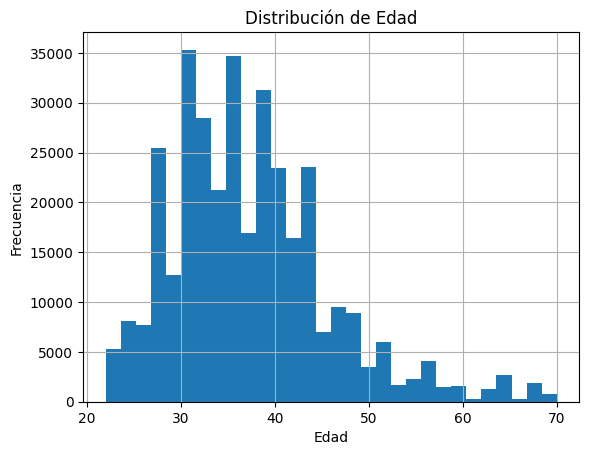

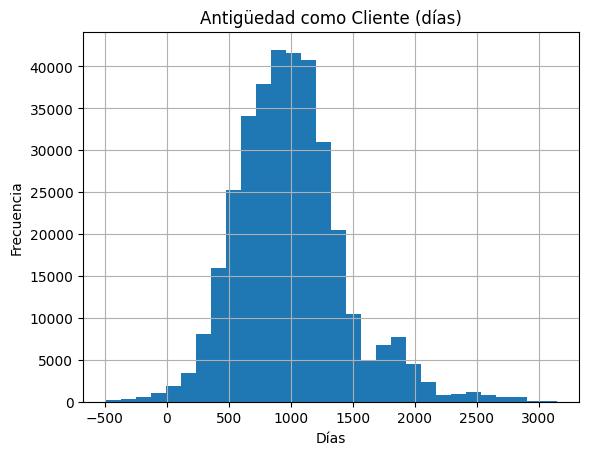

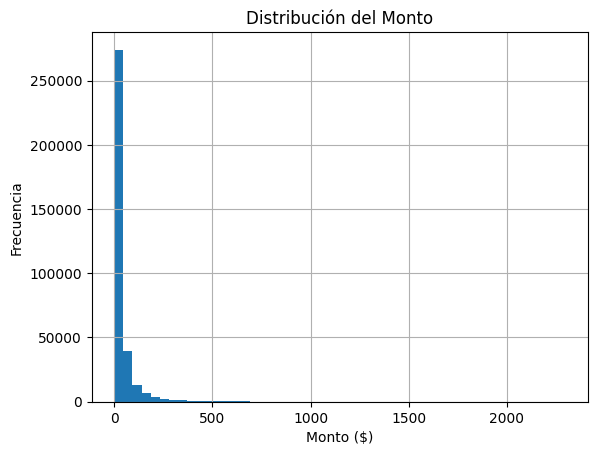

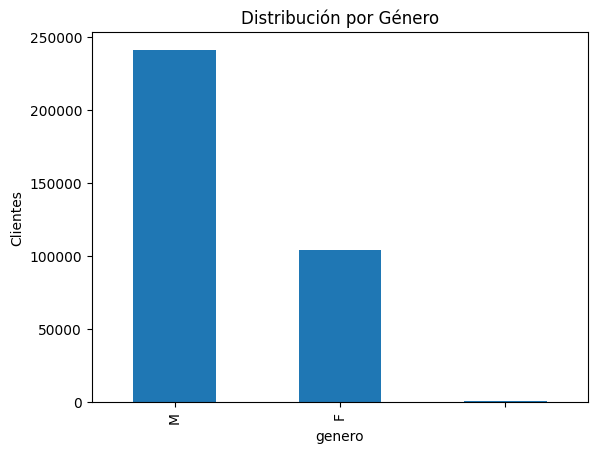

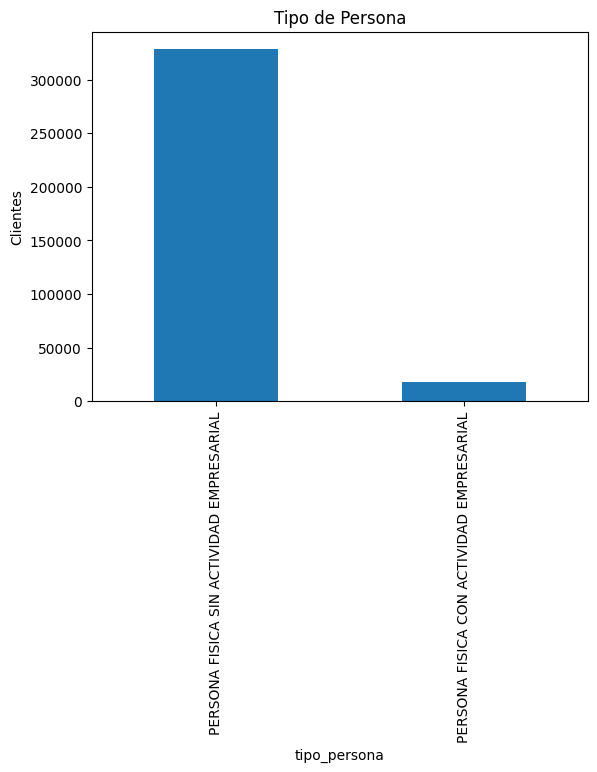

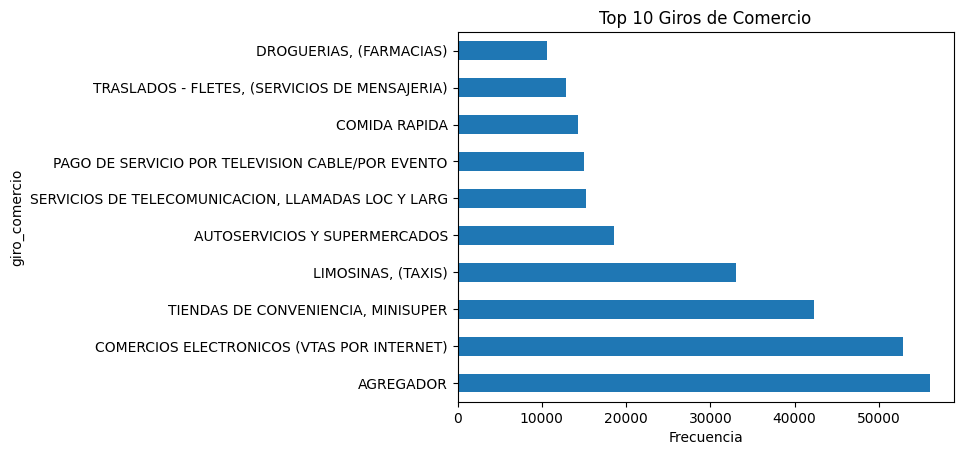

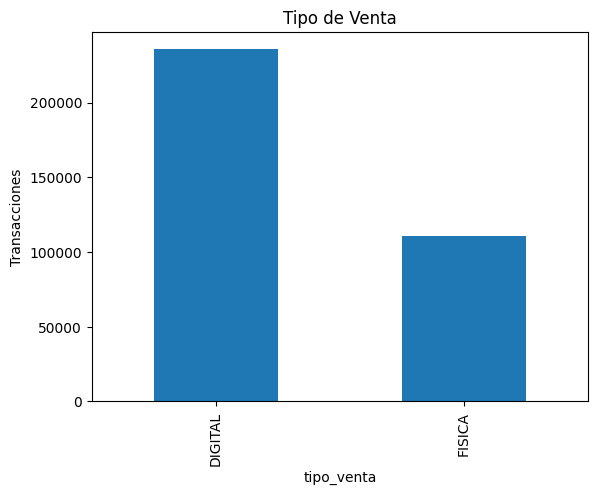

In [19]:
import matplotlib.pyplot as plt

# Edad
df_merged['edad'].hist(bins=30)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# La mayoria concentración de usuarios esta entre 25 y 45 años es jve , hay pocos usuarios mayores de 60
# Esto explica el uso alto de canales digitales.

# Antigüedad
df_merged['antiguedad_dias'].hist(bins=30)
plt.title('Antigüedad como Cliente (días)')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

# Muchos usuarios tienen menos de 1,000 días de antiguedad que es aproximadamente 3 años , es nueva
#Es positivo por lo que el negocio esta  en crecimiento, hay oportunidad de fidelidad a largo plazo.
# Monto
df_merged['monto'].hist(bins=50)
plt.title('Distribución del Monto')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.show()


# Género
#Destacan mas los usuarios de gente masculina
df_merged['genero'].value_counts().plot(kind='bar')
plt.title('Distribución por Género')
plt.ylabel('Clientes')
plt.show()

# Tipo de persona
# Predominan las personas fisicas sin actividad empresarial
df_merged['tipo_persona'].value_counts().plot(kind='bar')
plt.title('Tipo de Persona')
plt.ylabel('Clientes')
plt.show()
# Los mas frecuentes incluyen agregador , ventas por internet , tiendas de conveniencia , taxis y autoservicios.
# Giro de comercio (top 10)
df_merged['giro_comercio'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Giros de Comercio')
plt.xlabel('Frecuencia')
plt.show()

# Tipo de venta
df_merged['tipo_venta'].value_counts().plot(kind='bar')
plt.title('Tipo de Venta')
plt.ylabel('Transacciones')
plt.show()

In [20]:
df_merged.info()
df_merged.describe(include='all')
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346011 entries, 0 to 346010
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     346011 non-null  object        
 1   fecha_nacimiento       343979 non-null  datetime64[ns]
 2   fecha_alta             346011 non-null  datetime64[ns]
 3   id_municipio           346011 non-null  int64         
 4   id_estado              346011 non-null  int64         
 5   tipo_persona           346011 non-null  object        
 6   genero                 346011 non-null  object        
 7   actividad_empresarial  346011 non-null  object        
 8   fecha                  346011 non-null  datetime64[ns]
 9   comercio               346011 non-null  object        
 10  giro_comercio          346011 non-null  object        
 11  tipo_venta             346011 non-null  object        
 12  monto                  346011 non-null  floa

,0
id,0
fecha_nacimiento,2032
fecha_alta,0
id_municipio,0
id_estado,0
tipo_persona,0
genero,0
actividad_empresarial,0
fecha,0
comercio,0


Se hizo una serie de tiempo con respecto al monto

<Axes: xlabel='fecha'>

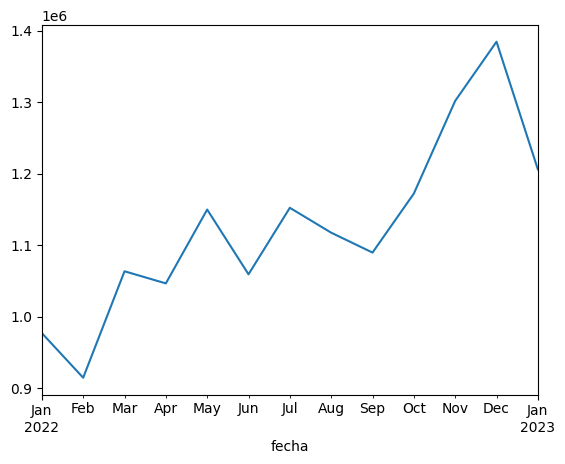

In [21]:
df_merged['fecha'] = pd.to_datetime(df_merged['fecha'])
df_merged.groupby(df_merged['fecha'].dt.to_period('M'))['monto'].sum().plot()

<Axes: xlabel='tipo_venta'>

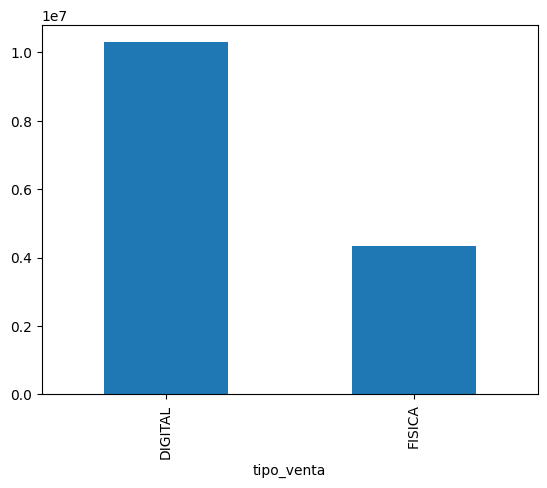

In [22]:
df_merged.groupby('tipo_venta')['monto'].sum().plot(kind='bar')

<Axes: xlabel='segmento'>

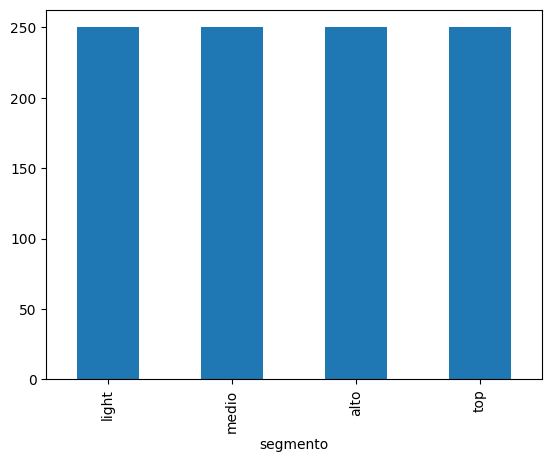

In [23]:
clientes_total = df_merged.groupby('id')['monto'].sum().reset_index()
clientes_total['segmento'] = pd.qcut(clientes_total['monto'], 4, labels=['light', 'medio', 'alto', 'top'])
clientes_total['segmento'].value_counts().plot(kind='bar')

Se reemplaza en vez de tener un id  para los usuarios se agrupan con usuario 1 y respectivo número acorde que sea único.

In [24]:

id_to_usuario = {id_: f'Usuario {i+1}' for i, id_ in enumerate(df_merged['id'].unique())}

# Reemplazar directamente en la columna 'id'
df_merged['id'] = df_merged['id'].map(id_to_usuario)


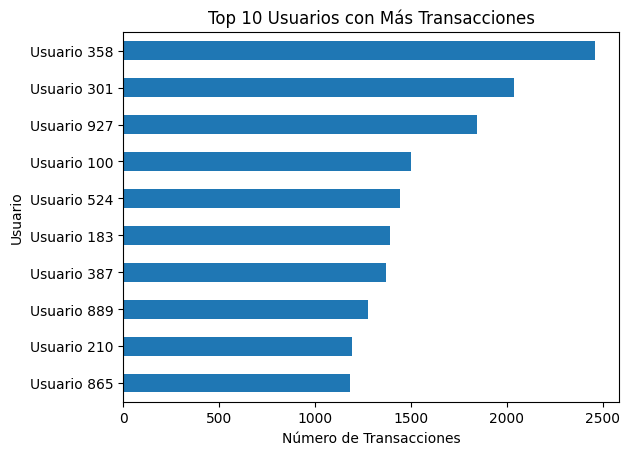

In [25]:
top_usuarios = df_merged['id'].value_counts().head(10)

top_usuarios.plot(kind='barh')
plt.title('Top 10 Usuarios con Más Transacciones')
plt.xlabel('Número de Transacciones')
plt.ylabel('Usuario')
plt.gca().invert_yaxis()
plt.show()

In [26]:
n_usuarios = df_merged['id'].nunique()
print(f'Hay {n_usuarios} usuarios únicos.')

Hay 1000 usuarios únicos.


Se logra ver cuantos usuarios hay por municipio.

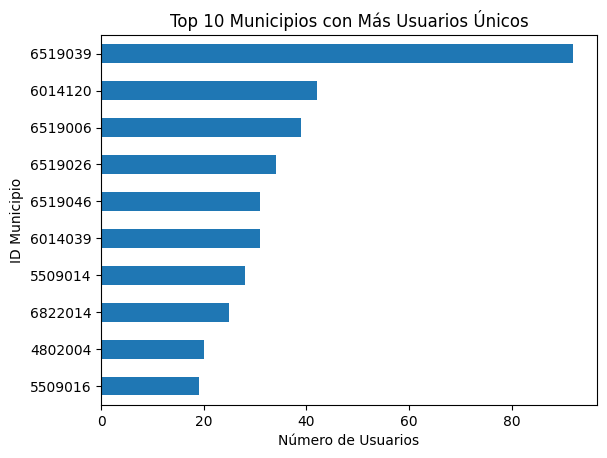

In [28]:
usuarios_por_municipio = df_merged.groupby('id_municipio')['id'].nunique().sort_values(ascending=False)

usuarios_por_municipio.head(10).plot(kind='barh')
plt.title('Top 10 Municipios con Más Usuarios Únicos')
plt.xlabel('Número de Usuarios')
plt.ylabel('ID Municipio')
plt.gca().invert_yaxis()
plt.show()

In [29]:
usuarios_por_municipio_df = usuarios_por_municipio.reset_index()
usuarios_por_municipio_df.columns = ['id_municipio', 'usuarios_unicos']
usuarios_por_municipio_df.head()

,id_municipio,usuarios_unicos
0,6519039,92
1,6014120,42
2,6519006,39
3,6519026,34
4,6519046,31


In [30]:
df_merged.head()

,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial,fecha,comercio,giro_comercio,tipo_venta,monto,edad,antiguedad_dias
0,Usuario 1,1984-06-19,2015-10-25,6822006,68,PERSONA FISICA SIN ACTIVIDAD EMPRESARIAL,,EMPLEADO DEL SECTOR SERVICIOS,2022-01-02,COPPEL,TIENDA DEPARTAMENTAL,DIGITAL,131.90,40.0,2261
1,Usuario 1,1984-06-19,2015-10-25,6822006,68,PERSONA FISICA SIN ACTIVIDAD EMPRESARIAL,,EMPLEADO DEL SECTOR SERVICIOS,2022-01-02,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),DIGITAL,2.54,40.0,2261
2,Usuario 1,1984-06-19,2015-10-25,6822006,68,PERSONA FISICA SIN ACTIVIDAD EMPRESARIAL,,EMPLEADO DEL SECTOR SERVICIOS,2022-01-02,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),DIGITAL,47.80,40.0,2261
3,Usuario 1,1984-06-19,2015-10-25,6822006,68,PERSONA FISICA SIN ACTIVIDAD EMPRESARIAL,,EMPLEADO DEL SECTOR SERVICIOS,2022-01-02,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",FISICA,17.01,40.0,2261
4,Usuario 1,1984-06-19,2015-10-25,6822006,68,PERSONA FISICA SIN ACTIVIDAD EMPRESARIAL,,EMPLEADO DEL SECTOR SERVICIOS,2022-01-04,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",FISICA,6.44,40.0,2263


In [31]:
output_path = os.path.join(folder_path, 'df_merged_final.csv')
df_merged.to_csv(output_path, index=False)
print(f"Archivo guardado en: {output_path}")

Archivo guardado en: /content/drive/MyDrive/Datathon 2025/df_merged_final.csv
